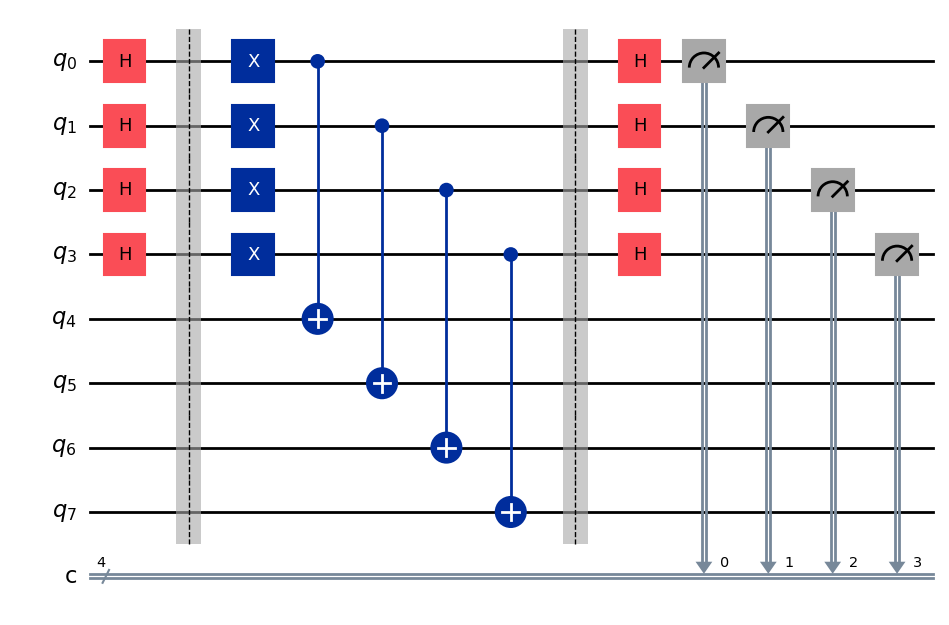

In [2]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

def one_to_one_oracle(qc, s, n):
    for i in range(n):
        if np.random.rand() > 0.5:
            qc.x(i)
    for i in range(n):
        qc.cx(i, i + n)
            
def two_to_one_oracle(qc, s, n):
    flag = 0
    for i, si in enumerate(reversed(s)):
        qc.cx(i, i + n)
        if si == '1' and flag == 0:
            qc.x(i)
            for j, sj in enumerate(reversed(s)):
                if sj == '1':
                    qc.cx(i, j + n)
            qc.x(i)
            flag = 1


# アルゴリズムの本体
n = 4
N = np.random.randint(1, 2**n-1)
s = bin(N)[2:].zfill(n)

qc = QuantumCircuit(n * 2, n)

# Hゲートを各量子ビットに適用
for i in range(n):
    qc.h(i)

qc.barrier()

# オラクルの選択
if np.random.rand() > 0.5:
    two_to_one_oracle(qc, s, n)
    selected = 'two_to_one'
else:
    one_to_one_oracle(qc, s, n)
    selected = 'one_to_one'

qc.barrier()

# 再度Hゲートを適用
for i in range(n):
    qc.h(i)

# 測定
for i in range(n):
    qc.measure(i, i)
    
qc.draw(output='mpl')


one_to_one
s = 0010


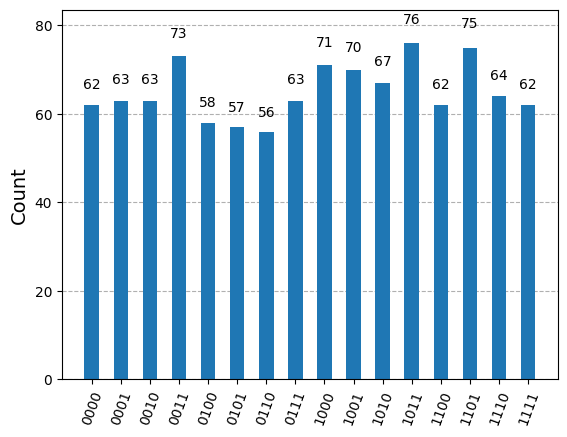

In [3]:

# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1042).result()

# 結果を取得して表示
answer = result.get_counts()
print(selected)
print('s =', s)
plot_histogram(answer)


In [4]:

# オラクルのみからなる量子回路に |s> を入力
qc = QuantumCircuit(n * 2, n)

for i, si in enumerate(reversed(s)):
    if si == '1':
        qc.x(i)

two_to_one_oracle(qc, s, n)

for i in range(n):
    qc.measure(i + n, i)
    
# AerSimulatorを使用して実行
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=128).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)


{'0010': 128}


In [5]:

# オラクルのみからなる量子回路に |0> を入力
qc = QuantumCircuit(n * 2, n)

two_to_one_oracle(qc, s, n)

for i in range(n):
    qc.measure(i + n, i)
    
# AerSimulatorを使用して実行
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=128).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)


{'0010': 128}
